# Geoapify Melbourne Hospitals

In [1]:
# Dependencies
import requests
import json
import pandas as pd

# Import the API key
from config import geoapify_key

In [2]:
# Set the parameters for the type of place
categories = "healthcare.hospital"

# Set the parameters for the type of search
filters = f"place:51de47c27f321e624059bb2043e6c6e742c0f00101f90106b2240000000000c0020992031143697479206f66204d656c626f75726e65"
limit = 500

# set up a parameters dictionary
params = {
    "categories":categories,
    "limit":limit,
    "filter":filters,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

In [3]:
# print the response url, avoid doing for public github repos in order to avoid exposing key
print(response.url)

https://api.geoapify.com/v2/places?categories=healthcare.hospital&limit=500&filter=place%3A51de47c27f321e624059bb2043e6c6e742c0f00101f90106b2240000000000c0020992031143697479206f66204d656c626f75726e65&apiKey=79372d4c67c34669935344d46743808f


In [4]:
# convert response to json
places_data = response.json()

# Print the json (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    144.98437756007402,
                    -37.81231589869587
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "St Vincent's Private Hospital East Melbourne",
                "address_line2": "159 Grey Street, East Melbourne VIC 3002, Australia",
                "categories": [
                    "healthcare",
                    "healthcare.hospital",
                    "wheelchair",
                    "wheelchair.yes"
                ],
                "city": "Melbourne",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "addr:city": "East Melbourne",
           

In [5]:
# Loop through all the restaurants
for feature in places_data["features"]:
    # Retrieve the desired information for each restaurant
    name = feature["properties"]["name"]
    address = feature["properties"]["address_line2"]
    
    cuisine = None  # Set a default value for cuisine
    
    # Check if the cuisine information exists in the data
    if "datasource" in feature["properties"] and "raw" in feature["properties"]["datasource"]:
        raw_data = feature["properties"]["datasource"]["raw"]
        if "cuisine" in raw_data:
            cuisine = raw_data["cuisine"]
    
    municipality = feature["properties"].get("municipality", None)
    suburb = feature["properties"].get("suburb", None)
    postcode = feature["properties"].get("postcode", None)
    
    # Print the information for each restaurant
    print("Restaurant Name:", name)
    print("Address:", address)
    print("Cuisine:", cuisine)
    print("Municipality:", municipality)
    print("Suburb:", suburb)
    print("Postcode:", postcode)
    print()  # Print an empty line between restaurants

Restaurant Name: St Vincent's Private Hospital East Melbourne
Address: 159 Grey Street, East Melbourne VIC 3002, Australia
Cuisine: None
Municipality: City of Melbourne
Suburb: East Melbourne
Postcode: 3002

Restaurant Name: The Royal Melbourne Hospital
Address: 300 Grattan Street, Parkville VIC 3050, Australia
Cuisine: None
Municipality: City of Melbourne
Suburb: Parkville
Postcode: 3050

Restaurant Name: Royal Children's Hospital
Address: 50 Flemington Road, North Melbourne VIC 3051, Australia
Cuisine: None
Municipality: City of Melbourne
Suburb: North Melbourne
Postcode: 3051

Restaurant Name: Epworth Freemasons
Address: 320 Victoria Parade, East Melbourne VIC 3002, Australia
Cuisine: None
Municipality: City of Melbourne
Suburb: East Melbourne
Postcode: 3002

Restaurant Name: Eye and Ear on the Park
Address: 2 St Andrews Place, East Melbourne VIC 3002, Australia
Cuisine: None
Municipality: City of Melbourne
Suburb: East Melbourne
Postcode: 3002

Restaurant Name: Royal Victorian Eye 

In [6]:
import requests
import pandas as pd

# Import the API key
from config import geoapify_key

# Set the parameters for the type of place - hospital
categories = "healthcare.hospital"

# Set the parameters for the type of search of Melbourne (incl all Municipalities)
filters = "place:51397cf9ca8e286240593190f739f8ec42c0f00101f9016cca400000000000c002089203094d656c626f75726e65"
limit = 500

# Set up a parameters dictionary
params = {
    "categories": categories,
    "limit": limit,
    "filter": filters,
    "apiKey": geoapify_key
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# Run a request using our params dictionary
response = requests.get(base_url, params=params)

# Convert response to JSON
places_data = response.json()

# Create an empty list to store hospital data
hospital_data = []

# Check if "features" key exists in the JSON response
if "features" in places_data:
    # Loop through all the hospitals
    for feature in places_data["features"]:
        # Retrieve the desired information for each hospital
        properties = feature.get("properties", {})
        name = properties.get("name", None)
        address = properties.get("address_line2", None)
        municipality = properties.get("municipality", None)
        suburb = properties.get("suburb", None)
        postcode = properties.get("postcode", None)

        # Append the hospital data to the list
        hospital_data.append({
            "Hospital Name": name,
            "Address": address,
            "Municipality": municipality,
            "Suburb": suburb,
            "Postcode": postcode
        })

    # Create a DataFrame from the hospital data
    hospital_df = pd.DataFrame(hospital_data)
    
    # Export the hospital count by postcode to a CSV file
    hospital_df.to_csv("hospital_list.csv")

    # Count the number of hospitals by postcode
    hospital_count_by_postcode = hospital_df["Postcode"].value_counts()

    # Create a DataFrame from the hospital count by postcode
    hospital_count_by_postcode_df = pd.DataFrame(hospital_count_by_postcode)

    # Rename the column to "Hospital Count"
    hospital_count_by_postcode_df.columns = ["Hospital Count"]

    # Sort the DataFrame by postcode in ascending order
    hospital_count_by_postcode_df = hospital_count_by_postcode_df.sort_index()

    # Export the hospital count by postcode to a CSV file
    hospital_count_by_postcode_df.to_csv("hospital_count_by_postcode.csv", index_label="Postcode")
    
    # Print the hospital count by postcode
    print("Hospital Count by Postcode:")
    print(hospital_count_by_postcode_df)
else:
    print("No hospital data found.")

Hospital Count by Postcode:
      Hospital Count
3000               3
3002               9
3004               1
3011               2
3016               1
...              ...
3910               2
3915               1
3931               3
3939               1
3977               1

[78 rows x 1 columns]


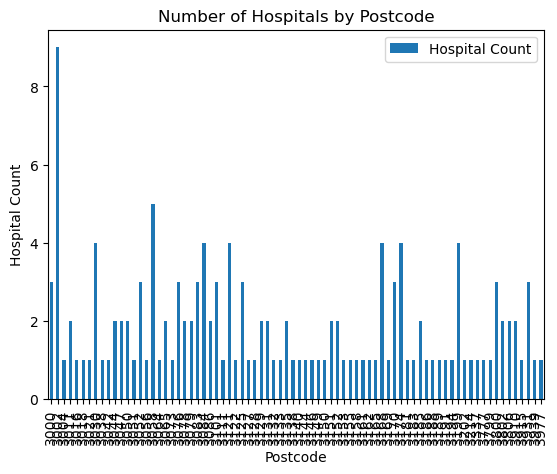

In [7]:
    import matplotlib.pyplot as plt
    # Plot the bar chart
    hospital_count_by_postcode_df.plot.bar()
    plt.xlabel("Postcode")
    plt.ylabel("Hospital Count")
    plt.title("Number of Hospitals by Postcode")
    plt.show()

In [8]:
## limited to 500 supermarkets, may need to run twice##
import requests
import pandas as pd

# Import the API key
from config import geoapify_key

# Set the parameters for the type of place - hospital
categories = "commercial.supermarket"

# Set the parameters for the type of search of Melbourne (incl all Municipalities)
filters = "place:51397cf9ca8e286240593190f739f8ec42c0f00101f9016cca400000000000c002089203094d656c626f75726e65"
limit = 500

# Set up a parameters dictionary
params = {
    "categories": categories,
    "limit": limit,
    "filter": filters,
    "apiKey": geoapify_key
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# Run a request using our params dictionary
response = requests.get(base_url, params=params)

# Convert response to JSON
places_data = response.json()

# Create an empty list to store hospital data
supermarket_data = []

# Check if "features" key exists in the JSON response
if "features" in places_data:
    # Loop through all the hospitals
    for feature in places_data["features"]:
        # Retrieve the desired information for each hospital
        properties = feature.get("properties", {})
        name = properties.get("name", None)
        address = properties.get("address_line2", None)
        municipality = properties.get("municipality", None)
        suburb = properties.get("suburb", None)
        postcode = properties.get("postcode", None)

        # Append the supermarket data to the list
        supermarket_data.append({
            "Supermarket Name": name,
            "Address": address,
            "Municipality": municipality,
            "Suburb": suburb,
            "Postcode": postcode
        })

    # Create a DataFrame from the supermarket data
    supermarket_df = pd.DataFrame(supermarket_data)
    
    # Export the supermarket count by postcode to a CSV file
    supermarket_df.to_csv("supermarket_list.csv")

    # Count the number of supermarket by postcode
    supermarket_count_by_postcode = supermarket_df["Postcode"].value_counts()

    # Create a DataFrame from the supermarket count by postcode
    supermarket_count_by_postcode_df = pd.DataFrame(supermarket_count_by_postcode)

    # Rename the column to "Supermarket Count"
    supermarket_count_by_postcode_df.columns = ["Supermarket Count"]

    # Sort the DataFrame by postcode in ascending order
    supermarket_count_by_postcode_df = supermarket_count_by_postcode_df.sort_index()

    # Export the supermarket count by postcode to a CSV file
    supermarket_count_by_postcode_df.to_csv("supermarket_count_by_postcode.csv", index_label="Postcode")
    
    # Print the supermarket count by postcode
    print("supermarket Count by Postcode:")
    print(supermarket_count_by_postcode_df)
else:
    print("No supermarket data found.")

supermarket Count by Postcode:
      Supermarket Count
3000                  6
3002                  2
3003                  1
3006                  2
3008                  3
...                 ...
3943                  1
3975                  1
3976                  2
3977                 10
3979                  2

[179 rows x 1 columns]


In [10]:
import requests
import pandas as pd

# Import the API key
from config import geoapify_key

# Set the parameters for the type of place - police
categories = "service.police"

# Set the parameters for the type of search of Melbourne (incl all Municipalities)
filters = "place:51397cf9ca8e286240593190f739f8ec42c0f00101f9016cca400000000000c002089203094d656c626f75726e65"
limit = 500

# Set up a parameters dictionary
params = {
    "categories": categories,
    "limit": limit,
    "filter": filters,
    "apiKey": geoapify_key
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# Run a request using our params dictionary
response = requests.get(base_url, params=params)

# Convert response to JSON
places_data = response.json()

# Create an empty list to store hospital data
police_data = []

# Check if "features" key exists in the JSON response
if "features" in places_data:
    # Loop through all the police stations
    for feature in places_data["features"]:
        # Retrieve the desired information for each police stations
        properties = feature.get("properties", {})
        name = properties.get("name", None)
        address = properties.get("address_line2", None)
        municipality = properties.get("municipality", None)
        suburb = properties.get("suburb", None)
        postcode = properties.get("postcode", None)

        # Append the police data to the list
        police_data.append({
            "Police Station": name,
            "Address": address,
            "Municipality": municipality,
            "Suburb": suburb,
            "Postcode": postcode
        })

    # Create a DataFrame from the police data
    police_df = pd.DataFrame(police_data)
    
    # Export the police count by postcode to a CSV file
    police_df.to_csv("police_list.csv")

    # Count the number of police by postcode
    police_count_by_postcode = police_df["Postcode"].value_counts()

    # Create a DataFrame from the police count by postcode
    police_count_by_postcode_df = pd.DataFrame(police_count_by_postcode)

    # Rename the column to "police Count"
    police_count_by_postcode_df.columns = ["Police Count"]

    # Sort the DataFrame by postcode in ascending order
    police_count_by_postcode_df = police_count_by_postcode_df.sort_index()

    # Export the police count by postcode to a CSV file
    police_count_by_postcode_df.to_csv("police_count_by_postcode.csv", index_label="Postcode")
    
    # Print the police count by postcode
    print("police Count by Postcode:")
    print(police_count_by_postcode_df)
else:
    print("No policedata found.")

police Count by Postcode:
      Police Count
3000             6
3006             1
3011             1
3016             1
3018             1
...            ...
3936             1
3939             1
3941             1
3943             1
3977             1

[98 rows x 1 columns]


In [29]:
# Append the DataFrames
police_hospital_supermarket_df = pd.concat([police_count_by_postcode_df, hospital_count_by_postcode_df, supermarket_count_by_postcode_df], axis=1, keys=["Postcode", "Postcode", "Postcode"])

# Reset index and sort by postcode
police_hospital_supermarket_df = police_hospital_supermarket_df.reset_index().sort_values("index")

# Rename the "index" column to "Postcode"
police_hospital_supermarket_df = police_hospital_supermarket_df.rename(columns={"index": "Postcode"})

# Export the police count by postcode to a CSV file
police_hospital_supermarket_df.to_csv("police_hospital_supermarket.csv", index_label="Postcode")

# Print the concatenated DataFrame
print(police_hospital_supermarket_df)

    Postcode                                              
             Police Count Hospital Count Supermarket Count
0       3000          6.0            3.0               6.0
98      3002          NaN            9.0               2.0
135     3003          NaN            NaN               1.0
99      3004          NaN            1.0               NaN
1       3006          1.0            NaN               2.0
..       ...          ...            ...               ...
96      3943          1.0            NaN               1.0
201     3975          NaN            NaN               1.0
202     3976          NaN            NaN               2.0
97      3977          1.0            1.0              10.0
203     3979          NaN            NaN               2.0

[204 rows x 4 columns]


In [16]:
print(police_hospital_supermarket_df.columns)



MultiIndex([('Postcode',                  ''),
            ('Postcode',      'Police Count'),
            ('Postcode',    'Hospital Count'),
            ('Postcode', 'Supermarket Count')],
           )


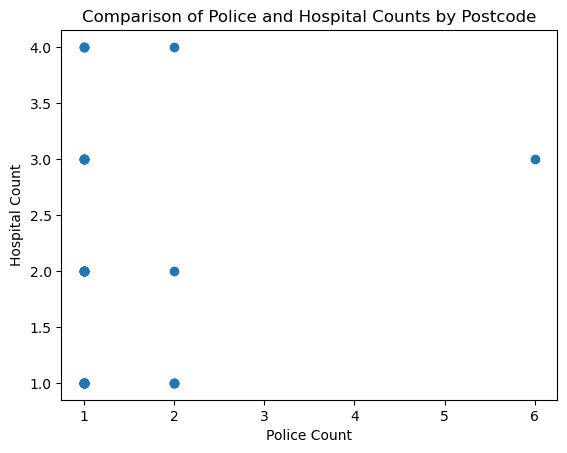

In [17]:
# Extract the counts of police and hospitals from the DataFrame
police_counts = police_hospital_supermarket_df.xs(('Postcode', 'Police Count'), axis=1)
hospital_counts = police_hospital_supermarket_df.xs(('Postcode', 'Hospital Count'), axis=1)

# Create a scatter plot
plt.scatter(police_counts, hospital_counts)

# Add labels and title
plt.xlabel("Police Count")
plt.ylabel("Hospital Count")
plt.title("Comparison of Police and Hospital Counts by Postcode")

# Show the scatter plot
plt.show()

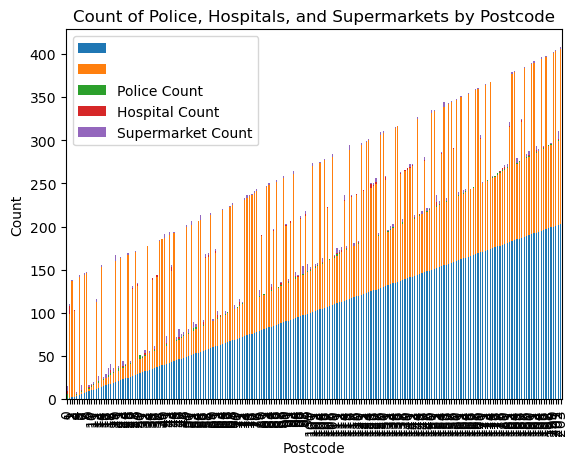

In [26]:
# Reset the index of the DataFrame
police_hospital_supermarket_df.reset_index(drop=True, inplace=True)

# Drop the 'Level_0' column
police_hospital_supermarket_df = police_hospital_supermarket_df.droplevel(0, axis=1)

# Plot the stacked bar chart
police_hospital_supermarket_df.plot.bar(stacked=True)

# Add labels and title
plt.xlabel("Postcode")
plt.ylabel("Count")
plt.title("Count of Police, Hospitals, and Supermarkets by Postcode")

# Show the stacked bar chart
plt.show()
